In [1]:
import pandas as pd

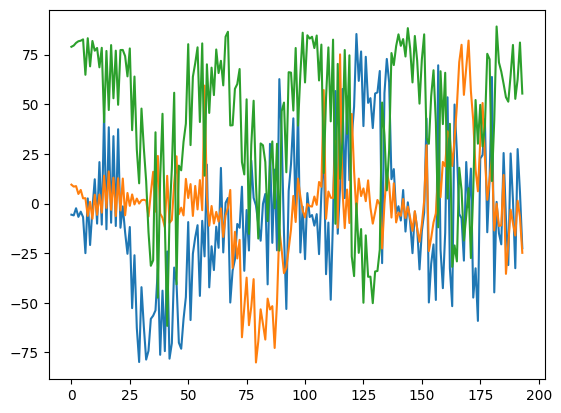

In [35]:
data=pd.read_csv("/kaggle/input/csvcsv/CSV/3.csv")
import matplotlib.pyplot as plt
plt.plot(data["x"])
plt.plot(data["y"])
plt.plot(data["z"])

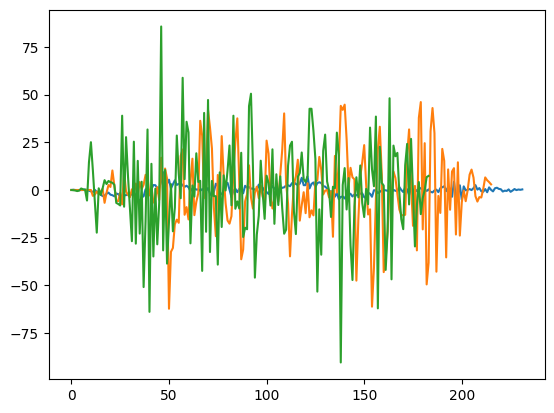

In [52]:
import numpy as np
for i in range(0,3):
    data=pd.read_csv(f"/kaggle/input/csvcsv/CSV/{i}.csv")
    def moving_average(data, window_size):
        return data.rolling(window=window_size, min_periods=1).mean()
    window_size = 5
    arr = moving_average(data['x'], window_size)
    # plt.plot(data['x'])
    # plt.plot(arr)
    plt.plot(data['x']-arr)

In [135]:
import numpy as np
from scipy.stats import kurtosis, skew

def comp(signal):
    features = []
    
    # Standard deviation
    features.append(np.std(signal))
    
    # Mean Absolute Deviation (MAD)
    features.append(np.mean(np.abs(signal - np.mean(signal))))
    
    # Root Mean Square (RMS) Deviation
    features.append(np.sqrt(np.mean(signal**2)))
    
    # Kurtosis
    features.append(kurtosis(signal))
    
    # Skewness
    features.append(skew(signal))
    
    # Percentiles (e.g., 25th and 75th percentiles)
    features.append(np.percentile(signal, 25))
    features.append(np.percentile(signal, 75))
    
    # Entropy
    histogram, _ = np.histogram(signal, bins=50, density=True)
    entropy_val = -np.sum(histogram*np.log2(histogram + np.finfo(float).eps))
    features.append(entropy_val)
    
    # Autocorrelation
    autocorrelation = np.correlate(signal, signal, mode='full')
    features.append(np.max(autocorrelation))
    
    # Power Spectral Density (PSD) using numpy's FFT
    psd = np.abs(np.fft.fft(signal))**2 / len(signal)
    features.append(np.mean(psd))
    
    # Signal-to-Noise Ratio (SNR)
    signal_power = np.sum(signal**2)
    noise_power = np.sum((signal - np.mean(signal))**2)
    snr = 10 * np.log10(signal_power / noise_power)
    features.append(snr)
    
    return features

# Example usage:
x_train=[]
y_train=[]
for i in range(0,4):
    data=pd.read_csv(f"/kaggle/input/csvcsv/CSV/{i}.csv")
    ax=moving_average(data['x'], window_size)
    ay=moving_average(data['y'], window_size)
    az=moving_average(data['z'], window_size)
    for j in range(0,len(data),10):
        xf=comp(np.nan_to_num(data['x'][j:j+10]-ax[j:j+10],nan=0))
        yf=comp(np.nan_to_num(data['y'][j:j+10]-ay[j:j+10],nan=0))
        zf=comp(np.nan_to_num(data['z'][j:j+10]-az[j:j+10],nan=0))
        x_train.append([xf,yf,zf])
        y_train.append(i)


/tmp/ipykernel_33/1948646560.py:42: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


In [136]:
from tensorflow.keras.utils import to_categorical
x_train=np.array(x_train)
x_train=x_train.reshape(-1,33)
y_train=np.array(y_train)
y_train = to_categorical(y_train)

print(x_train.shape,y_train.shape)

(85, 33) (85, 4)


In [137]:
from sklearn.preprocessing import StandardScaler

x_train_reshaped = x_train.reshape(-1, x_train.shape[-1])  # Reshape along the last axis (assuming "wis" axis)

# Initialize a StandardScaler object
scaler = StandardScaler()

# Normalize each column separately
for i in range(x_train_reshaped.shape[1]):  # Iterate over columns
    column_data = x_train_reshaped[:, i].reshape(-1, 1)  # Extract column data
    scaled_column_data = scaler.fit_transform(column_data)  # Scale column data
    x_train_reshaped[:, i] = scaled_column_data.flatten()  # Replace original column with scaled column data

# Reshape back to original shape
x_train = x_train_reshaped.reshape(x_train.shape)
x_train=np.nan_to_num(x_train,nan=0)
assert not np.any(np.isnan(x_train))

In [152]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

# Assuming x_train and y_train are your training data and labels respectively
# Assuming x_test is your test data

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(33,)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Assuming you have 5 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use sparse categorical cross-entropy if your labels are integers
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.05)

# Predict on test data



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2327 - loss: 1.3874 - val_accuracy: 0.2000 - val_loss: 1.3311
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6357 - loss: 0.8929 - val_accuracy: 0.2000 - val_loss: 1.0955
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.7239 - val_accuracy: 0.2000 - val_loss: 1.1212
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.6762 - val_accuracy: 0.2000 - val_loss: 1.2575
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.6587 - val_accuracy: 0.6000 - val_loss: 1.0199
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.5761 - val_accuracy: 0.0000e+00 - val_loss: 1.2236
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.4698 - val_accuracy: 0.4000 - val_loss: 1.1681
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.4655 - val_accuracy: 0.2000 - val_loss: 1.3498

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(85,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 0 0 1 3 3 3 3 3 3 3
 3 3 3 3 3 1 2 3 3 2 1]
Confusion Matrix:
[[24  0  0  0]
 [ 2 19  0  1]
 [ 1  2 16  0]
 [ 1  3  2 14]]


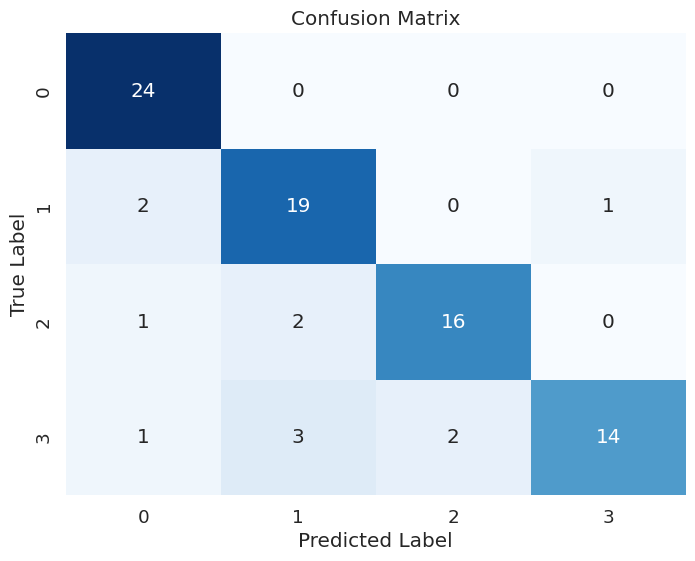

In [153]:
import seaborn as sns

y_pred = model.predict(x_train)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_p=np.argmax(y_train,axis=1)
print(y_pred_classes.shape)
print(y_pred_classes)
# Compute confusion matrix

from sklearn.metrics import confusion_matrix

# Assuming y_test is your true labels and y_pred_classes is your predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_p, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()